# ITMAL Exercise

REVISIONS| |
---------| |
2018-0318| CEF, initial.
2018-0321| CEF, synced with MLP moon exercise.
2018-0323| CEF, minor updated and spell checked.
2019-0930| CEF, updated for ITMAL E19.


## Keras Multi-Layer Perceptrons (MLP's) on MNIST-data


### Qa Using a Keras MLP on the MNIST-data

Now, make a Keras `Sequential` model and fit it to the MNIST data, re-using as much of the code form the `mlp_moon.ipynb` as you can.

Then try to change the number of hidden layers and the neurons in each layer, looking for increases in test accuracy via ``score``. 

Publish your best score for your model in Blackboard, see link under L06. We use categorical accuracy for score---eventhough a $F_1$ score could say more. Publish you result like
```
   ITMALGrpXY: score=0.76, a 10-20-30-20-10 MLP, takes looong to train
```
or similar


NOTE: you probably need to scale/normalize the MNIST data before a fit, and no 2D-decision boundaries can be drawn from the 784-dimension MNIST data.

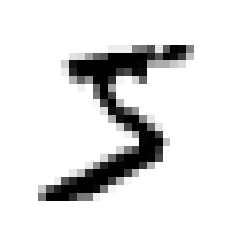

In [1]:
# TODO: Qa..

from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784',cache=True, return_X_y=True) # needs to return X, y, replace '??' with suitable parameters! 
# Convert at scale (not always needed)
X = X / 255.0

import numpy as np
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    
MNIST_PlotDigit(X[0])

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn import datasets

import numpy as np
from time import time

# Build Keras model 
model = Sequential()
model.add(Dense(input_dim=784, units=784, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(units=256, activation="sigmoid", kernel_initializer="he_normal"))
model.add(Dense(units=10, activation="softmax", kernel_initializer="he_normal"))

#optimizer = SGD(lr=0.001)
optimizer = Adam(lr=0.001, clipvalue=1.0, beta_1=0.875, beta_2=0.999)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

#reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', verbose=1, factor=0.5,
#                              patience=3, min_lr=0.000001)

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2

training_samples = 60000

X_train, X_test, y_train, y_test = X[:training_samples], X[training_samples:], y[:training_samples], y[training_samples:]

shuffle_index = np.random.permutation(training_samples)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)

assert y.ndim==1
assert y_train_binary.ndim==2
assert y_test_binary.ndim ==2

# Train
VERBOSE     = 0
EPOCHS      = 30
BATCH_SIZE  = 200

print("Starting training!")
start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE, batch_size=BATCH_SIZE)
t = time()-start

print(f"OK, training time={t:0.1f}")

score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

X.shape=(70000, 784)
Starting training!
OK, training time=141.6
Training time: 141.6 sec
Test loss:     0.06747045371082855
Test accuracy: 0.9856
All scores in history: [0.06747045371082855, 0.9856, 0.0024581022611121577, 0.003206587527862774]
